In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [4]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,Population_NHPI,Population_Hispanic,Population_NHW,Percent_Insufficient_Sleep,Average_Traffic_Volume_per_Meter_of_Major_Roadways,Percent_Homeowners,Percent_Severe_Housing_Cost_Burden,Percent_Children_in_Poverty,Teen_Birth_Rate,Level
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,42,517,302,36,0,62,10.0,13.0,NaN,1
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,135,791,1328,34,0,28,9.0,8.0,NaN,1
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,7827,27107,167099,30,463,61,13.0,12.0,NaN,1
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,43,442,1757,35,5,61,10.0,41.0,NaN,2
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,3,66,381,31,0,53,4.0,15.0,NaN,1


In [5]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Population_NHPI,Population_Hispanic,Population_NHW,Percent_Insufficient_Sleep,Average_Traffic_Volume_per_Meter_of_Major_Roadways,Percent_Homeowners,Percent_Severe_Housing_Cost_Burden,Percent_Children_in_Poverty,Teen_Birth_Rate,Level
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3072.000000,3.072000e+03,3.072000e+03,3072.000000,3072.000000,3072.000000,544.000000,544.000000,67.000000,3072.000000
mean,17.832357,3.972363,4.149642,17.361979,32.817708,7.424577,27.353516,62.892578,17.485677,11.504232,...,258.945964,1.938041e+04,6.330064e+04,32.950195,129.269531,71.492839,13.215074,24.731618,35.462687,2.469727
std,4.704372,0.696459,0.592199,3.548037,5.430713,1.270692,5.692320,23.424658,3.176629,5.190727,...,2215.933059,1.294309e+05,1.441880e+05,4.145646,276.382929,8.239255,3.741617,9.833870,8.261500,1.104914
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,0.000000,1.000000e+00,2.300000e+01,23.000000,0.000000,4.000000,3.000000,3.000000,14.000000,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,49.000000,15.000000,7.000000,...,5.000000,3.737500e+02,7.950000e+03,30.000000,26.000000,68.000000,10.000000,17.750000,30.000000,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.700000,27.000000,66.000000,18.000000,11.000000,...,16.000000,1.114000e+03,2.005650e+04,33.000000,58.000000,73.000000,13.000000,24.000000,37.000000,2.000000
75%,21.000000,4.400000,4.600000,20.000000,36.000000,8.200000,31.000000,80.000000,20.000000,15.000000,...,69.000000,5.395250e+03,5.336875e+04,36.000000,123.000000,77.000000,16.000000,31.000000,41.000000,4.000000
max,41.000000,6.500000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,94079.000000,4.915287e+06,2.639358e+06,47.000000,4496.000000,92.000000,26.000000,68.000000,48.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1c66dd119c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c66dd6cac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c66dd07088>],
 'medians': [<matplotlib.lines.Line2D at 0x1c66dd79cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c66dd79d88>],
 'means': []}

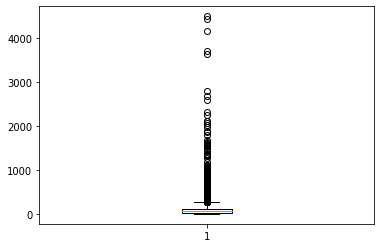

In [6]:
# This feature has so many outliers

series = df["Average_Traffic_Volume_per_Meter_of_Major_Roadways"]
plt.boxplot(series) 

In [7]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways"], inplace=True)

In [8]:
col_count = df.count()
col_count

State_Name                                       3072
County                                           3072
Percent_Fair_or_Poor_Health                      3072
Average_Number_of_Physically_Unhealthy_Days      3072
Average_Number_of_Mentally_Unhealthy_Days        3072
Percent_Smokers                                  3072
Percent_Adults_with_Obesity                      3072
Food_Environment_Index                           3072
Percent_Physically_Inactive                      3072
Percent_With_Access_to_Exercise_Opportunities    3072
Percent_Excessive_Drinking                       3072
Percent_Uninsured                                3072
Primary_Care_Physicians_Rate                     3072
Dentist_Rate                                     3072
Mental_Health_Provider_Rate                      3072
Preventable_Hospitalization_Rate                 3072
Percent_Vaccinated                               3072
High_School_Graduation_Rate                      3072
Percent_Some_College        

In [9]:
# Find columns that contain NULL value
col_null = list(col_count[col_count != 3072].index)
col_null

['Household_Income_AIAN',
 'Household_Income_Asian',
 'Household_Income_Black',
 'Household_Income_Hispanic',
 'Household_Income_White',
 'Percent_Severe_Housing_Cost_Burden',
 'Percent_Children_in_Poverty',
 'Teen_Birth_Rate']

In [10]:
# drop columns
df.drop(columns=["Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty","Teen_Birth_Rate"], inplace=True)


In [11]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [12]:
col_count = df.count()
col_count

State_Name                                       3072
County                                           3072
Percent_Fair_or_Poor_Health                      3072
Average_Number_of_Physically_Unhealthy_Days      3072
Average_Number_of_Mentally_Unhealthy_Days        3072
Percent_Smokers                                  3072
Percent_Adults_with_Obesity                      3072
Food_Environment_Index                           3072
Percent_Physically_Inactive                      3072
Percent_With_Access_to_Exercise_Opportunities    3072
Percent_Excessive_Drinking                       3072
Percent_Uninsured                                3072
Primary_Care_Physicians_Rate                     3072
Dentist_Rate                                     3072
Mental_Health_Provider_Rate                      3072
Preventable_Hospitalization_Rate                 3072
Percent_Vaccinated                               3072
High_School_Graduation_Rate                      3072
Percent_Some_College        

In [13]:
# Find columns with percent
#percent_cols = [ col for col in df.columns if col.startswith( 'Percent_' ) ]
# Convert back to number
#value_cols = df[percent_cols].multiply(df["Population"]//100, axis="index")
# assign new values
#df[percent_cols] = value_cols
#df.head()

In [14]:
# Target
y = df["Level"].values
print(y)
# Create our features
X = df.drop(columns=["Level","State_Name","County"])
X.head()

[1 1 1 ... 2 2 3]


,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Household_Income_White,Population,Population_Black,Population_AIAN,Population_Asian,Population_NHPI,Population_Hispanic,Population_NHW,Percent_Insufficient_Sleep,Percent_Homeowners
0,17,3.4,2.8,17,51,5.3,30,100,17,28,...,87679.0,3515,366,692,1524,42,517,302,36,62
1,15,3.0,2.5,15,44,7.6,30,100,19,20,...,107250.0,5723,371,674,2359,135,791,1328,34,28
2,15,3.5,3.2,15,32,8.0,18,100,21,13,...,95107.0,291538,15883,25865,29418,7827,27107,167099,30,61
3,24,5.4,4.6,30,31,2.9,31,100,22,20,...,114286.0,18216,166,15263,174,43,442,1757,35,61
4,15,3.7,3.6,18,42,6.9,29,100,21,17,...,98333.0,877,7,286,12,3,66,381,31,53


In [15]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=78, stratify=y)

In [16]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

# Logistic Regression

In [17]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', random_state=78)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Run the test with model
y_pred = lr_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5476522547652255

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,296,182,16,11
Actual 2,142,357,104,66
Actual 3,18,138,137,145
Actual 4,12,61,78,388


In [20]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61       505
           2       0.48      0.53      0.51       669
           3       0.41      0.31      0.35       438
           4       0.64      0.72      0.68       539

    accuracy                           0.55      2151
   macro avg       0.54      0.54      0.54      2151
weighted avg       0.54      0.55      0.54      2151



# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create a model Decision Tree
dt_model =  DecisionTreeClassifier(random_state=78) 

In [22]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [23]:
# Run the test with model
y_pred = dt_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.4788470478847048

In [24]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,255,168,58,24
Actual 2,169,302,115,83
Actual 3,30,143,146,119
Actual 4,32,64,116,327


In [25]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.52      0.50      0.51       505
           2       0.45      0.45      0.45       669
           3       0.34      0.33      0.33       438
           4       0.59      0.61      0.60       539

    accuracy                           0.48      2151
   macro avg       0.47      0.47      0.47      2151
weighted avg       0.48      0.48      0.48      2151



In [26]:
importances = dt_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.12412179254134197, 'Percent_Smokers'),
 (0.06225074324933311, 'Median_Household_Income'),
 (0.05338551378266199, 'Violent_Crime_Rate'),
 (0.04575619390165204, 'Population_Hispanic'),
 (0.03726325620070947, 'Percent_Excessive_Drinking'),
 (0.035515387847226396, 'Percent_Physically_Inactive'),
 (0.03477557528003105, 'Social_Association_Rate'),
 (0.03460952550694679, 'Percent_Some_College'),
 (0.034316581975467206, 'Percent_Drive_Alone_to_Work'),
 (0.030315358931117017, 'Percent_Insufficient_Sleep'),
 (0.028757833666324596, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.026917569051968605, 'Household_Income_White'),
 (0.025970793279206768, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.023557531967303966, 'Population_NHW'),
 (0.0231052189017675, 'Polution_Average_Daily_PM2.5'),
 (0.021851029692421996, 'Primary_Care_Physicians_Rate'),
 (0.02096617943866901, 'Percent_Adults_with_Obesity'),
 (0.02075458499462647, 'Population'),
 (0.020289959400799286, 'Household_Income_Asian'),

# KNeighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=25)

In [28]:
kn_model = kn_model.fit(X_train_scaled, y_train)

In [29]:
# Run the test with model
y_pred = kn_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5509065550906556

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,266,209,16,14
Actual 2,122,383,93,71
Actual 3,26,121,141,150
Actual 4,9,44,91,395


In [31]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.53      0.57       505
           2       0.51      0.57      0.54       669
           3       0.41      0.32      0.36       438
           4       0.63      0.73      0.68       539

    accuracy                           0.55      2151
   macro avg       0.54      0.54      0.54      2151
weighted avg       0.55      0.55      0.54      2151



In [32]:
importances = dt_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.12412179254134197, 'Percent_Smokers'),
 (0.06225074324933311, 'Median_Household_Income'),
 (0.05338551378266199, 'Violent_Crime_Rate'),
 (0.04575619390165204, 'Population_Hispanic'),
 (0.03726325620070947, 'Percent_Excessive_Drinking'),
 (0.035515387847226396, 'Percent_Physically_Inactive'),
 (0.03477557528003105, 'Social_Association_Rate'),
 (0.03460952550694679, 'Percent_Some_College'),
 (0.034316581975467206, 'Percent_Drive_Alone_to_Work'),
 (0.030315358931117017, 'Percent_Insufficient_Sleep'),
 (0.028757833666324596, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.026917569051968605, 'Household_Income_White'),
 (0.025970793279206768, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.023557531967303966, 'Population_NHW'),
 (0.0231052189017675, 'Polution_Average_Daily_PM2.5'),
 (0.021851029692421996, 'Primary_Care_Physicians_Rate'),
 (0.02096617943866901, 'Percent_Adults_with_Obesity'),
 (0.02075458499462647, 'Population'),
 (0.020289959400799286, 'Household_Income_Asian'),

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=256, random_state=78) 

In [34]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [35]:
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5685727568572757

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,276,208,10,11
Actual 2,119,413,78,59
Actual 3,12,156,135,135
Actual 4,6,57,77,399


In [37]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.55      0.60       505
           2       0.50      0.62      0.55       669
           3       0.45      0.31      0.37       438
           4       0.66      0.74      0.70       539

    accuracy                           0.57      2151
   macro avg       0.57      0.55      0.55      2151
weighted avg       0.57      0.57      0.56      2151



# Extra Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
# Create a extra Trees classifier.
et_model = ExtraTreesClassifier(n_estimators=256, random_state=78) 

In [39]:
et_model = et_model.fit(X_train_scaled, y_train)

In [40]:
# Run the test with model
y_pred = et_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5625290562529056

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,268,217,7,13
Actual 2,107,420,76,66
Actual 3,11,149,114,164
Actual 4,6,58,67,408


In [42]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.53      0.60       505
           2       0.50      0.63      0.56       669
           3       0.43      0.26      0.32       438
           4       0.63      0.76      0.69       539

    accuracy                           0.56      2151
   macro avg       0.56      0.54      0.54      2151
weighted avg       0.56      0.56      0.55      2151



# Ada Boost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=256)

In [44]:
ab_model = ab_model.fit(X_train_scaled, y_train)

In [45]:
# Run the test with model
y_pred = ab_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5230125523012552

In [46]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,305,159,34,7
Actual 2,168,321,113,67
Actual 3,22,136,146,134
Actual 4,8,75,103,353


In [47]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.60      0.61       505
           2       0.46      0.48      0.47       669
           3       0.37      0.33      0.35       438
           4       0.63      0.65      0.64       539

    accuracy                           0.52      2151
   macro avg       0.52      0.52      0.52      2151
weighted avg       0.52      0.52      0.52      2151



# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=78)

In [49]:
gb_model = gb_model.fit(X_train_scaled, y_train)

In [50]:
# Run the test with model
y_pred = gb_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5532310553231056

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,299,172,23,11
Actual 2,141,367,112,49
Actual 3,22,142,141,133
Actual 4,15,50,91,383


In [52]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61       505
           2       0.50      0.55      0.52       669
           3       0.38      0.32      0.35       438
           4       0.66      0.71      0.69       539

    accuracy                           0.55      2151
   macro avg       0.54      0.54      0.54      2151
weighted avg       0.55      0.55      0.55      2151



# Deep Learning

In [53]:
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features*32
hidden_nodes_layer2 = number_input_features*16
hidden_nodes_layer3 = number_input_features*8
hidden_nodes_layer4 = number_input_features*4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fouth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1376)              60544     
_________________________________________________________________
dense_1 (Dense)              (None, 688)               947376    
_________________________________________________________________
dense_2 (Dense)              (None, 344)               237016    
_________________________________________________________________
dense_3 (Dense)              (None, 172)               59340     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 173       
Total params: 1,304,449
Trainable params: 1,304,449
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 921 samples
Epoch 1/100
921/921 [==============================] - 1s 687us/sample - loss: -21.1456 - accuracy: 0.2280
Epoch 2/100
921/921 [==============================] - 0s 262us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 3/100
921/921 [==============================] - 0s 282us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 4/100
921/921 [==============================] - 0s 282us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 5/100
921/921 [==============================] - 0s 295us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 6/100
921/921 [==============================] - 0s 294us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 7/100
921/921 [==============================] - 0s 292us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 8/100
921/921 [==============================] - 0s 286us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 9/100
921/921 [==============================] - 0s 280us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 10/100
921

921/921 [==============================] - 0s 305us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 77/100
921/921 [==============================] - 0s 283us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 78/100
921/921 [==============================] - 0s 317us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 79/100
921/921 [==============================] - 0s 288us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 80/100
921/921 [==============================] - 0s 329us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 81/100
921/921 [==============================] - 0s 337us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 82/100
921/921 [==============================] - 0s 290us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 83/100
921/921 [==============================] - 0s 288us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 84/100
921/921 [==============================] - 0s 304us/sample - loss: -22.4020 - accuracy: 0.2356
Epoch 85/100
921/921 [===================

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2151/2151 - 0s - loss: -2.2417e+01 - accuracy: 0.2348
Loss: -22.416593139307935, Accuracy: 0.23477452993392944
